In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizações
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregar os dados no formato CSV
data = pd.read_csv('data/dados_totais.csv', sep=",")


# Relatório de Análise de Tráfego e Segurança

## 1. Introdução
Este relatório apresenta uma análise detalhada dos dados de tráfego coletados. O objetivo é identificar padrões de uso, riscos de segurança e propor soluções para mitigar vulnerabilidades detectadas.

## 2. Tráfego de Rede
### 2.1 Distribuição de Requisições por Hora
Apresentação do gráfico que demonstra a distribuição do número de requisições ao longo das 24 horas do dia, destacando horários de maior atividade.

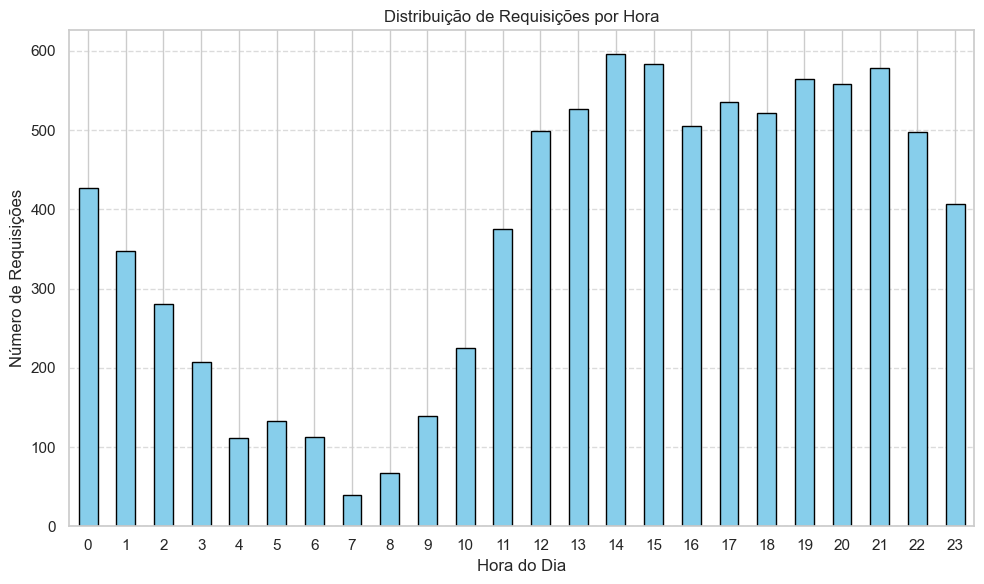

In [244]:
import re  # Importing the re module to use regular expressions

# Converter a coluna de timestamp para o formato datetime
data['EdgeStartTimestamp'] = pd.to_datetime(data['EdgeStartTimestamp'])

# Agrupando e contando o número de requisições por hora
hourly_requests = data['EdgeStartTimestamp'].dt.hour.value_counts().sort_index()

# Criando o gráfico
plt.figure(figsize=(10, 6))
hourly_requests.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição de Requisições por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Requisições')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.2 IPs Mais Ativos Durante os Horários de Pico
Análise dos IPs que mais realizaram requisições durante os horários de maior tráfego (13h às 21h). Gráfico de barras apresenta os 10 principais IPs.

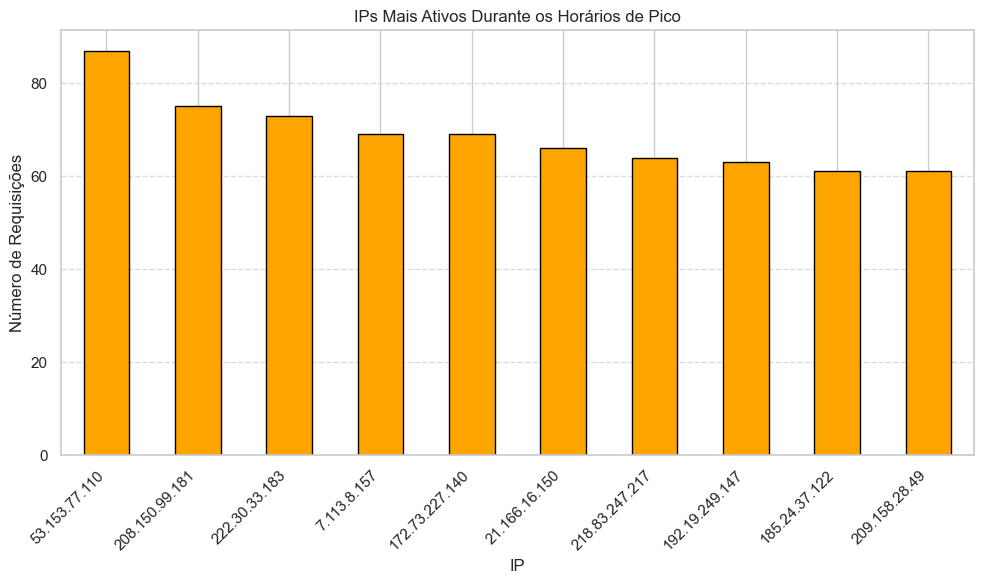

In [246]:
# Filtrando dados para os horários de pico (13h as 21h)
peak_hours = [13,14,15,16,17,18,19,20,21]
peak_data = data[data['EdgeStartTimestamp'].dt.hour.isin(peak_hours)]

# Contando os IPs mais ativos
peak_ips = peak_data['ClientIP'].value_counts().head(10)

# Criando o gráfico
plt.figure(figsize=(10, 6))
peak_ips.plot(kind='bar', color='orange', edgecolor='black')
plt.title('IPs Mais Ativos Durante os Horários de Pico')
plt.xlabel('IP')
plt.ylabel('Número de Requisições')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2.3 Distribuição dos Métodos de Requisição
Descrição da distribuição de métodos HTTP utilizados (GET, POST, etc.) e seu percentual em relação ao total de requisições.

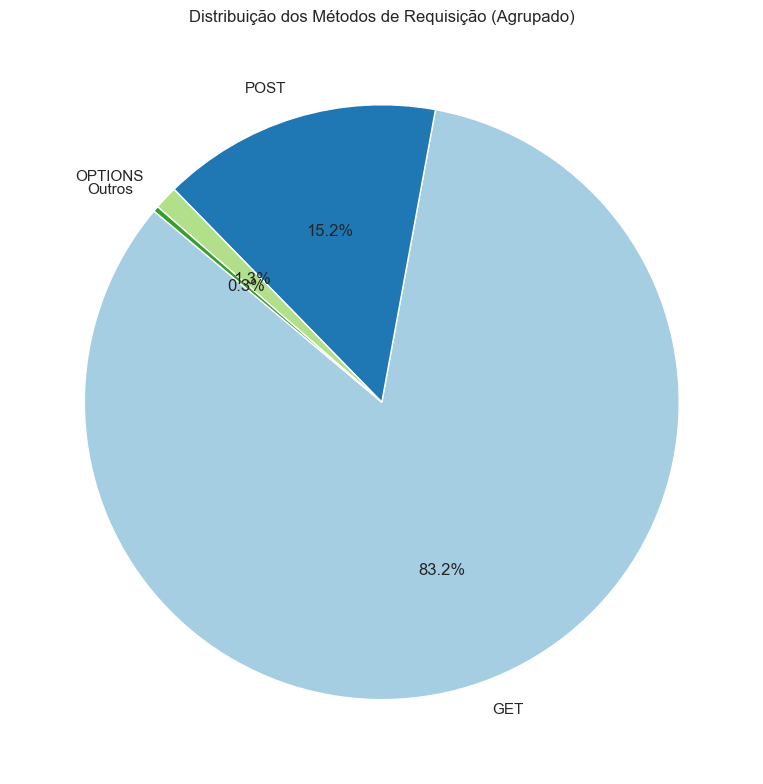

In [104]:
# Contar os métodos de requisição mais usados
most_used_methods = data['ClientRequestMethod'].value_counts()

# Agrupar métodos menos comuns em "Outros" (frequência < 50)
threshold = 50
filtered_methods = most_used_methods[most_used_methods >= threshold]
other_methods_count = most_used_methods[most_used_methods < threshold].sum()
filtered_methods['Outros'] = other_methods_count

# Criar o gráfico de pizza para os métodos de requisição
plt.figure(figsize=(8, 8))  # Criar uma nova figura para o gráfico
filtered_methods.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribuição dos Métodos de Requisição (Agrupado)')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()  

### 2.4 Distribuição Geográfica dos Acessos
A tabela demonstra a distribuição dos acessos por país, identificando regiões com maior concentração de tráfego.

In [19]:
import pandas as pd
from IPython.display import display

# Dicionário de siglas e nomes dos países
country_names = {
    "in": "India",
    "us": "United States",
    "br": "Brazil",
    "jp": "Japan",
    "gb": "United Kingdom",
    "fr": "France",
    "cn": "China",
    "de": "Germany",
    "au": "Australia",
    "ca": "Canada"
}

# Carregar o arquivo CSV 
file_path = r"data/dados_totais.csv" 
data = pd.read_csv(file_path)

# Contar os países mais frequentes (top 20)
most_frequent_countries = data['ClientCountry'].value_counts().head(20)

# Converter os países mais frequentes para um DataFrame
most_frequent_countries_df = most_frequent_countries.reset_index()
most_frequent_countries_df.columns = ['Sigla', 'Número de Requisições']

# Adicionar os nomes completos ao lado das siglas
most_frequent_countries_df['País (Sigla)'] = most_frequent_countries_df['Sigla'].apply(
    lambda sigla: f"{country_names.get(sigla, 'Desconhecido')} ({sigla})"
)

# Reorganizar as colunas
most_frequent_countries_df = most_frequent_countries_df[['País (Sigla)', 'Número de Requisições']]

# Adicionar uma coluna de numeração iniciando em 1
most_frequent_countries_df.index = most_frequent_countries_df.index + 1

# Exibir o DataFrame no console ou notebook
display(most_frequent_countries_df)

,País (Sigla),Número de Requisições
1,India (in),18372
2,United States (us),11481
3,Brazil (br),37
4,Japan (jp),34
5,United Kingdom (gb),26
6,France (fr),20
7,China (cn),10
8,Germany (de),8
9,Australia (au),8
10,Canada (ca),4


Recomendação: Avaliar se faz sentido permitir o acesso de outros países e se há necessidade de filtrar as requisições com base em geolocalização.

### 2.5 Contagem de IPs mais frequentes
Tabela apresentando os 20 IPs que mais realizaram requisições no ambiente. Essa análise é importante para identificar os principais emissores de tráfego, possibilitando diferenciar entre atividades legítimas e suspeitas, além de fornecer insights sobre comportamentos recorrentes no sistema.

In [106]:
# Contar os IPs mais frequentes (top 20)
most_used_ips = data['ClientIP'].value_counts().head(20)

# Converter os IPs mais frequentes para um DataFrame
most_used_ips_df = most_used_ips.reset_index()
most_used_ips_df.columns = ['IP', 'Número de Requisições']

# Adicionar uma coluna de numeração iniciando em 1
most_used_ips_df.index = most_used_ips_df.index + 1

# Exibir o DataFrame no console ou notebook
from IPython.display import display
display(most_used_ips_df)

,IP,Número de Requisições
1,53.153.77.110,156
2,208.150.99.181,119
3,125.227.246.131,116
4,185.24.37.122,115
5,209.158.28.49,114
6,129.53.13.62,114
7,222.30.33.183,114
8,159.168.200.38,112
9,21.166.16.150,112
10,192.19.249.147,112


Mais à frente será possível notar que os IPs com mais requisições também estão relacionados a requisições maliciosas, sendo recomendável o bloqueio, mesmo havendo tratamentos para evitar a exploração de vulnerabilidades. 

### 2.5 Tipo de Dispositivo e Tráfego por Minuto
Análise do tráfego segregado por tipo de dispositivo (desktop, mobile, etc.) e gráfico mostrando os picos de tráfego por minuto. Identificação de picos anômalos de tráfego que podem indicar possíveis ataques ou atividades suspeitas.

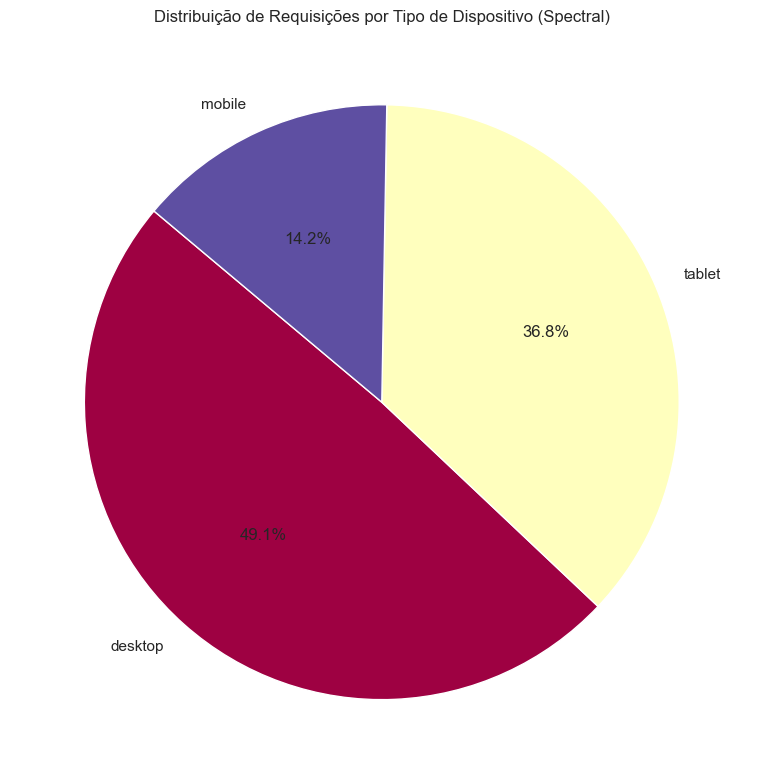

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Contar os dispositivos mais frequentes
most_frequent_devices = data['ClientDeviceType'].value_counts()

# Definir o colormap primeiro
color_map = plt.get_cmap('Spectral')

# Gerar um conjunto de cores distintas
colors = color_map(np.linspace(0, 1, len(most_frequent_devices)))

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
most_frequent_devices.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors
)
plt.title('Distribuição de Requisições por Tipo de Dispositivo (Spectral)')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()

Média de tráfego por minuto: 2.84
Desvio padrão: 1.89
Limite para picos: 8.52

Picos de tráfego identificados:
EdgeStartTimestamp
2024-11-05 12:21:00+00:00     9
2024-11-05 13:11:00+00:00    10
2024-11-05 13:43:00+00:00     9
2024-11-05 14:03:00+00:00     9
2024-11-05 14:32:00+00:00     9
                             ..
2024-11-14 14:20:00+00:00    11
2024-11-14 14:51:00+00:00    11
2024-11-14 16:21:00+00:00     9
2024-11-14 19:21:00+00:00    10
2024-11-14 20:43:00+00:00     9
Name: count, Length: 126, dtype: int64


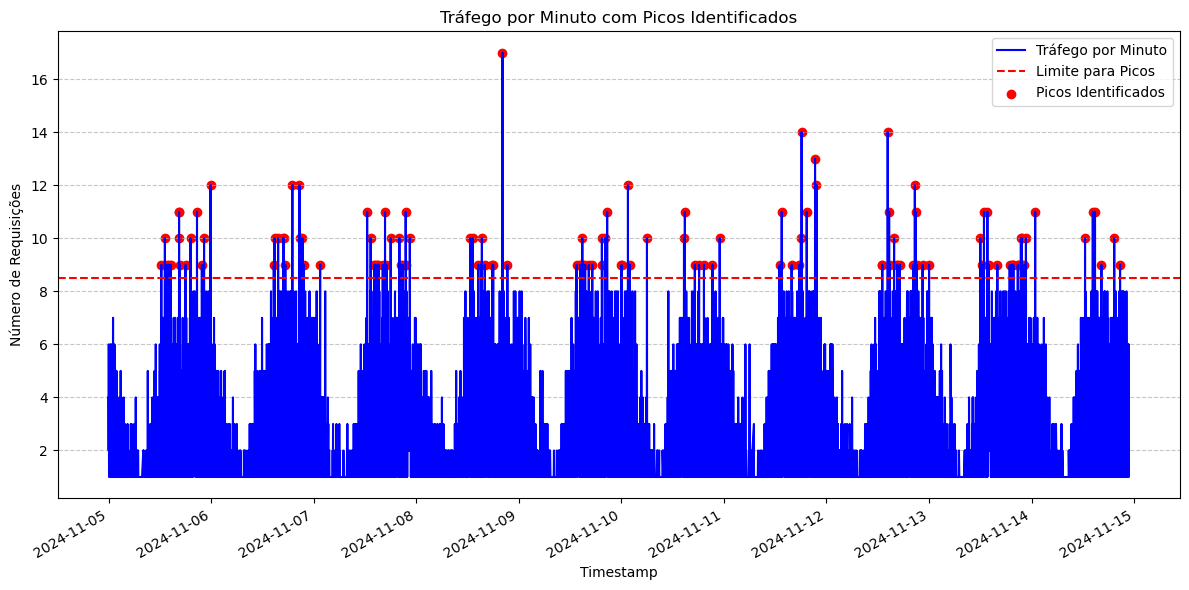

In [46]:
# Garantir que o timestamp está no formato datetime
data['EdgeStartTimestamp'] = pd.to_datetime(data['EdgeStartTimestamp'])

# Agrupar por intervalo de 1 minuto (usando 'min' em vez de 'T')
traffic_per_minute = data['EdgeStartTimestamp'].dt.floor('min').value_counts().sort_index()

# Calcular a média e o desvio padrão do tráfego
mean_traffic = traffic_per_minute.mean()
std_traffic = traffic_per_minute.std()

# Identificar picos (3 desvios padrão acima da média)
threshold = mean_traffic + 3 * std_traffic
anomalies = traffic_per_minute[traffic_per_minute > threshold]

# Exibir os resultados
print(f"Média de tráfego por minuto: {mean_traffic:.2f}")
print(f"Desvio padrão: {std_traffic:.2f}")
print(f"Limite para picos: {threshold:.2f}\n")
print("Picos de tráfego identificados:")
print(anomalies)

# Visualizar os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
traffic_per_minute.plot(label='Tráfego por Minuto', color='blue')
plt.axhline(threshold, color='red', linestyle='--', label='Limite para Picos')
plt.scatter(anomalies.index, anomalies, color='red', label='Picos Identificados')
plt.title('Tráfego por Minuto com Picos Identificados')
plt.xlabel('Timestamp')
plt.ylabel('Número de Requisições')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


O monitoramento de tráfego acima do limite em uma aplicação é essencial para identificar e mitigar possíveis ameaças à segurança e desempenho da aplicação.
Recomendação: Implementação de Rate Limits, restringindo o numero de requisições que um usuário pode fazer num determinado período e usar redes de distribuição de conteúdo para reduzir o impacto nos servidores. É importante avaliar casos excepcionais como eventos promocionais em que o pico de acesso será atingido mas por usuários legítimos.

## 3. Identificação de Riscos de Segurança

### 3.1 Ocorrências de UserAgents
Contagem e análise dos UserAgents menos utilizados, o que pode sugerir tentativa de ataque utilizando ferramentas automatizadas ou scripts antigos para explorar vulnerabilidades conhecidas, bem como falsificar o User Agent para evitar detecção ou enganar sistemas de segurança.


In [17]:
# Carregar os dados
file_path = r'data/dados_totais.csv'  
data = pd.read_csv(file_path)

# Contar as ocorrências de cada UserAgent
user_agent_counts = data['ClientRequestUserAgent'].value_counts()

# Definir o limite para considerar UserAgents incomuns (menos de 5 ocorrências)
uncommon_threshold = 5
uncommon_user_agents = user_agent_counts[user_agent_counts < uncommon_threshold]

# Criar um DataFrame com UserAgents incomuns e suas contagens
uncommon_user_agents_df = uncommon_user_agents.reset_index()
uncommon_user_agents_df.columns = ['UserAgent', 'Número de Ocorrências']

# Adicionar uma coluna de numeração iniciando em 1
uncommon_user_agents_df.index = uncommon_user_agents_df.index + 1
uncommon_user_agents_df.index.name = 'Nº'

# Exibir os UserAgents incomuns com numeração
print("UserAgents Incomuns (menos de 5 ocorrências):")
print(uncommon_user_agents_df)

UserAgents Incomuns (menos de 5 ocorrências):
                                              UserAgent  Número de Ocorrências
Nº                                                                            
1     Mozilla/5.0 (Windows; U; Windows NT 6.2) Apple...                      4
2     Mozilla/5.0 (Android 2.2.2; Mobile; rv:46.0) G...                      4
3     Opera/8.22.(Windows NT 5.1; az-AZ) Presto/2.9....                      4
4     Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_8_6...                      4
5     Opera/8.95.(Windows 98; is-IS) Presto/2.9.179 ...                      4
...                                                 ...                    ...
2377  Opera/9.35.(X11; Linux x86_64; crh-UA) Presto/...                      1
2378  Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_1...                      1
2379  Mozilla/5.0 (Android 2.0; Mobile; rv:55.0) Gec...                      1
2380  Mozilla/5.0 (Windows; U; Windows CE) AppleWebK...                      1
2381  

Recomendação: Criar uma lista de User Agents permitidos para acesso à aplicação e bloqueie de User Agents que não atendam a critérios predefinidos(antigos, desatualizados, sistemas legados, etc.). 

### 3.2 Distribuição de Injeções por Tipo de Dispositivo
Análise da distribuição de tentativas de exploração de vulnerabilidades do tipo Injection, com base no tipo de dispositivo utilizado.

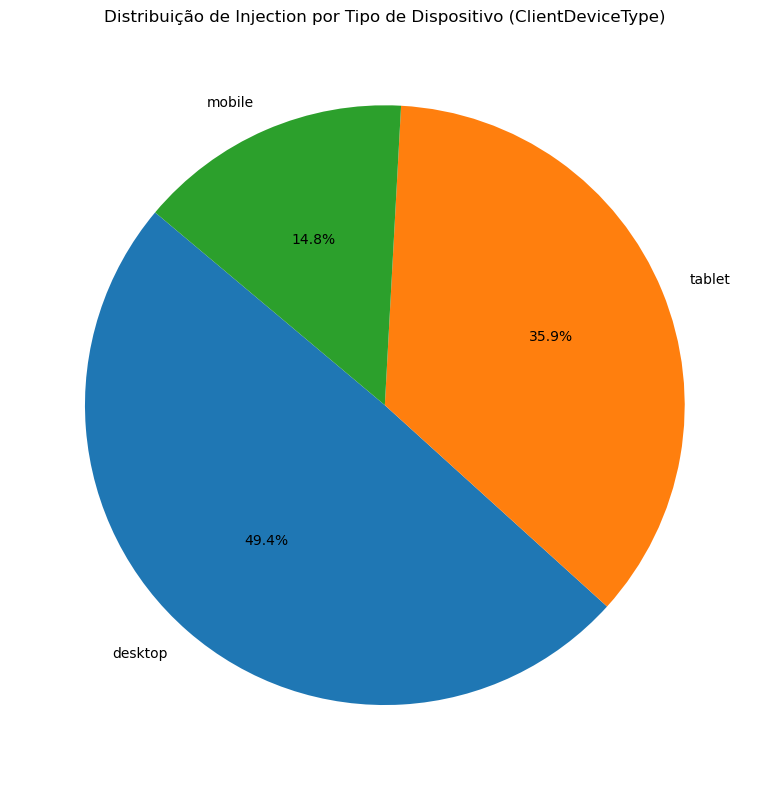

In [20]:
# Carregar os dados
file_path = r'data/todas_tentativas_injection_path_completo.csv'  # Substitua pelo caminho correto
data = pd.read_csv(file_path)

# Gráfico de Pizza - ClientDeviceType
device_counts = data['ClientDeviceType'].value_counts()
plt.figure(figsize=(8, 8))
device_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Injection por Tipo de Dispositivo (ClientDeviceType)')
plt.ylabel('')  # Remover rótulo do eixo Y
plt.tight_layout()
plt.show()

### 3.3 Distribuição de Injeções por IP, classificado em TOP 10
Análise da distribuição de tentativas de exploração de vulnerabilidades do tipo Injection, separado por número de tentativas por IP.

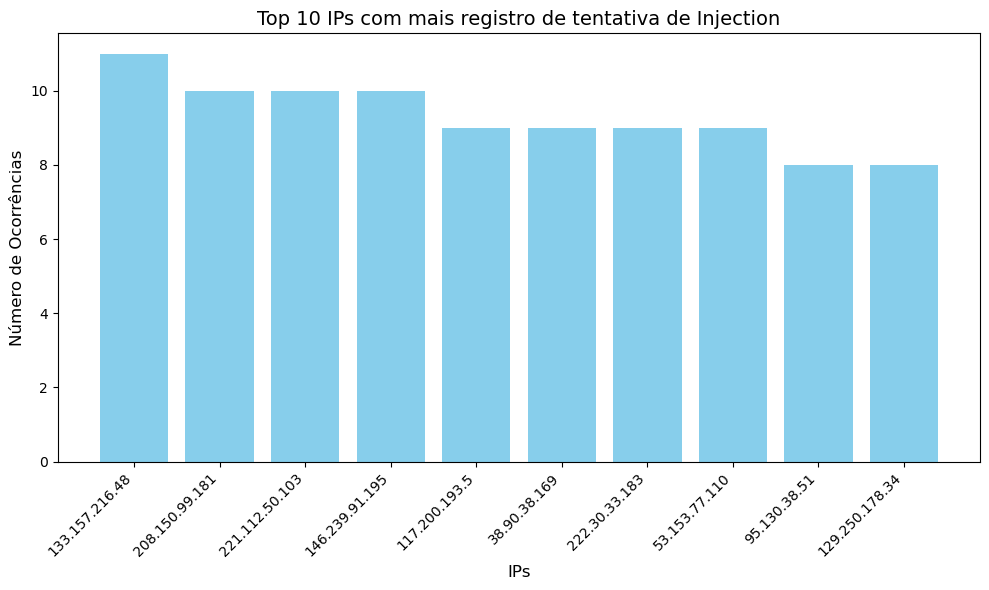

In [54]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt  

# Carregar os dados
file_path = r'data/todas_tentativas_injection_path_completo.csv'  
data = pd.read_csv(file_path)

# Lista com Top 10 IPs mais repetidos
top_ips = data['ClientIP'].value_counts().head(10)
top_ips_df = top_ips.reset_index()
top_ips_df.columns = ['IP', 'Número de Ocorrências']

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_ips_df['IP'], top_ips_df['Número de Ocorrências'], color='skyblue')
plt.title('Top 10 IPs com mais registro de tentativa de Injection', fontsize=14)
plt.xlabel('IPs', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Ips com muitas requisições também estão associados à tentativa de exploração de vulnerabilidades do tipo Injection, alguns dez recorrências ou mais. 

Recomendação: Bloquear os IPs maliciosos, validar todas as entradas para que não aceitem quaisquer caracteres e use prepared statements no banco de dados. Se aplicável, utilizar um firewall de aplicação que bloqueia este tipo de requisição em tempo real e também utilize bibliotecas anti-XSS.

### 3.3 Distribuição de Injeções por País
Classificação das tentativas de injeção por origem geográfica (top 2 países mais frequentes + outros).

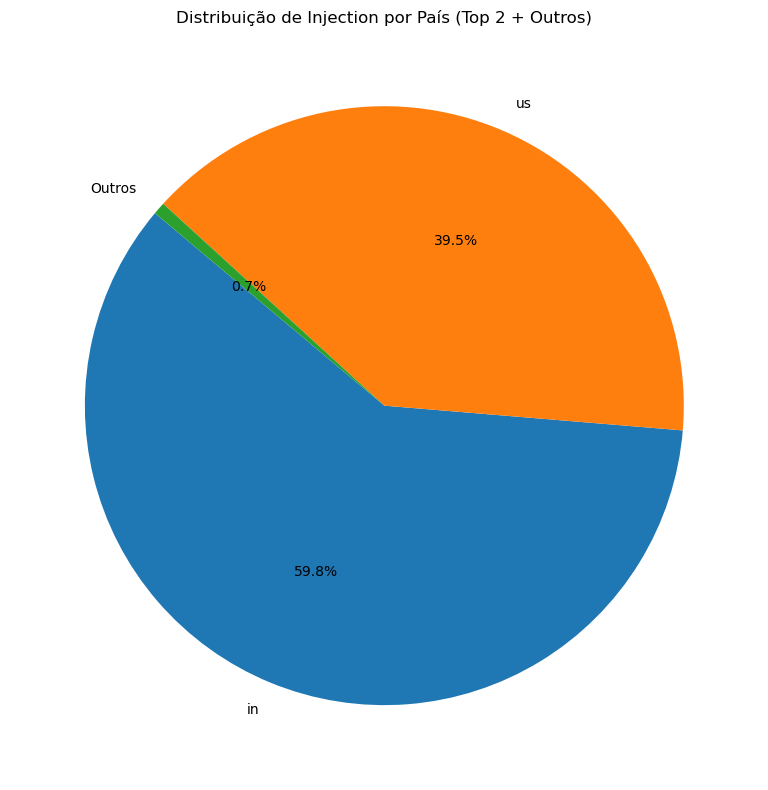

In [12]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt  

# Carregar os dados
file_path = r'data/todas_tentativas_injection_path_completo.csv'  
data = pd.read_csv(file_path)

# Gráfico de Pizza - ClientCountry 
country_counts = data['ClientCountry'].value_counts()
top_2_countries = country_counts.head(2)  # Dois países mais recorrentes
others_count = country_counts[2:].sum()   # Soma dos outros países
country_counts_adjusted = pd.concat([top_2_countries, pd.Series({'Outros': others_count})])

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
country_counts_adjusted.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Injection por País (Top 2 + Outros)')
plt.ylabel('')  # Remover rótulo do eixo Y
plt.tight_layout()
plt.show()

Recomendação: Validar se faz sentido a aplicação receber acesso de determinados países e criar regras de bloqueio por geolocalização para evitar ocorrência de acessos indevidos. Melhora a segurança da aplicação e sua performance, uma vez que esses acessos deixam de consumir recursos.

### 3.5 Referers e Hosts Relacionados a Injeções
A identificação de referers e hosts relacionados a tentativas de injeção é crucial para entender a origem dos ataques, o comportamento dos atacantes e mitigar futuras tentativas. Identificação dos principais referers e hosts que registraram tentativas de injeção (top 5).

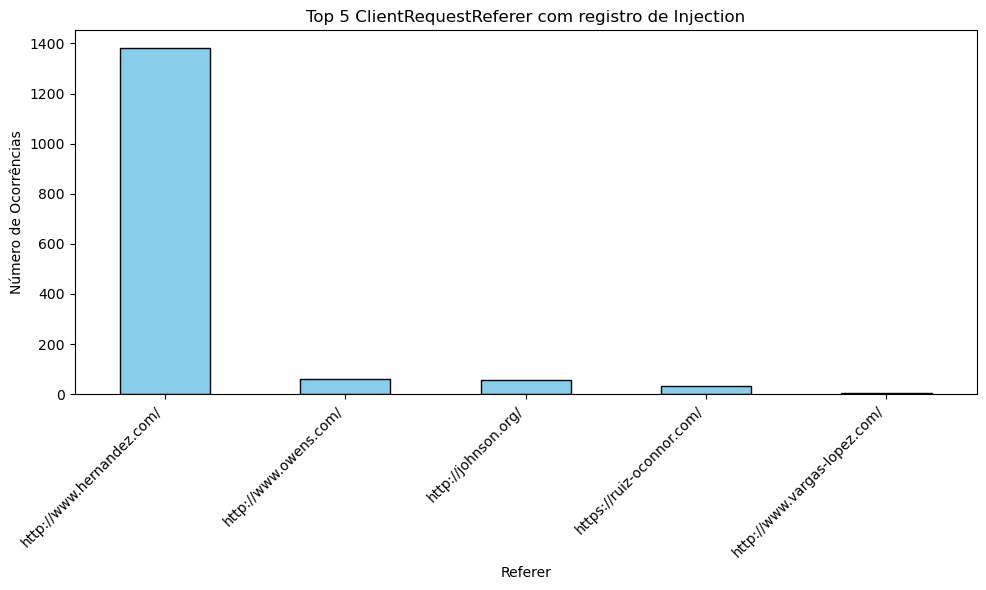

In [34]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt  

# Carregar os dados
file_path = r'data/todas_tentativas_injection_path_completo.csv'  
data = pd.read_csv(file_path)

# Gráfico de Barras - Top 5 ClientRequestReferer
referer_counts = data['ClientRequestReferer'].value_counts().head(5)
plt.figure(figsize=(10, 6))
referer_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 ClientRequestReferer com registro de Injection')
plt.xlabel('Referer')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


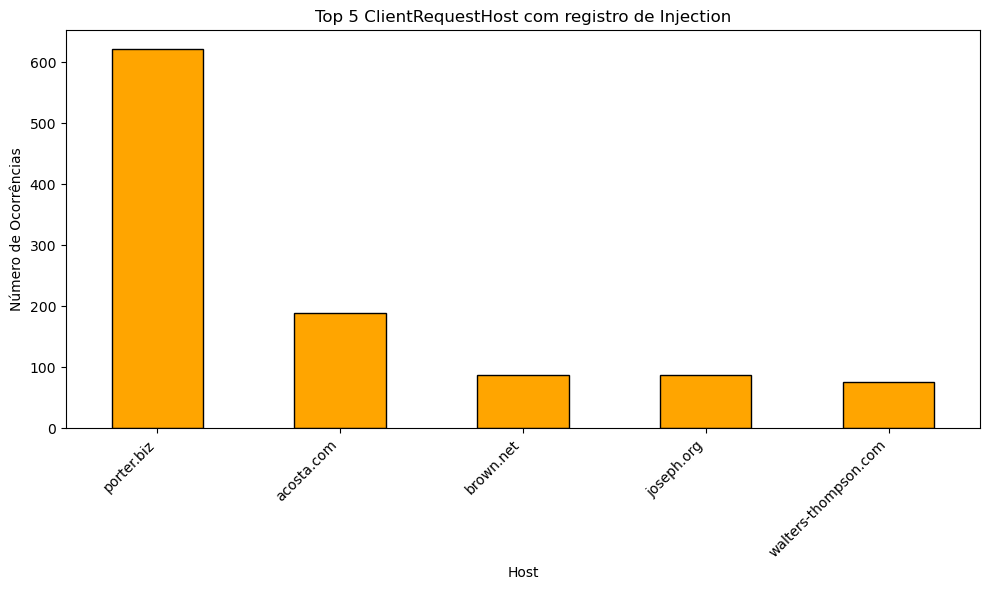

In [34]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt  # Certifique-se de importar matplotlib.pyplot

# Carregar os dados
file_path = r'data/todas_tentativas_injection_path_completo.csv'  # Substitua pelo caminho correto
data = pd.read_csv(file_path)

# Gráfico de Barras - Top 5 ClientRequestHost
host_counts = data['ClientRequestHost'].value_counts().head(5)
plt.figure(figsize=(10, 6))
host_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 5 ClientRequestHost com registro de Injection')
plt.xlabel('Host')
plt.ylabel('Número de Ocorrências')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Recomendação: Identificar se os referers são de sites legítimos. Aplicar regras de rate limit por Host e Referer, limitando a frequência de requisições vindas de aplicações suspeitas.

### 3.6 Resumo do Tráfego de IPs Associados a Vulnerabilidades
Descrição do comportamento dos IPs identificados como associados a exploração de vulnerabilidades, incluindo volume de requisições e bytes trafegados. É possível notar que alguns IPs registrados com 

In [32]:
# Carregar os dados do CSV
file_path = r'data/registros_filtrados.csv'  
data = pd.read_csv(file_path)

# Agrupar por IP e calcular o total de requisições e bytes trafegados
summary = data.groupby('ClientIP').agg(
    total_requests=('ClientIP', 'count'),
    total_bytes=('ClientRequestBytes', 'sum')
).reset_index()

# Ordenar por número de requisições
sorted_summary = summary.sort_values(by='total_requests', ascending=False)

# Exibir os 10 IPs mais ativos
top_10_ips = sorted_summary.head(10)

# Resumo textual
most_active_ip = sorted_summary.iloc[0]
total_requests_all = sorted_summary['total_requests'].sum()
total_bytes_all = sorted_summary['total_bytes'].sum()

print("Resumo do Tráfego de Ips que realizaram alguma exploração de VUlnerabildiade:")
print(f"IP mais ativo: {most_active_ip['ClientIP']}")
print(f" - Total de requisições: {most_active_ip['total_requests']}")
print(f" - Total de bytes trafegados: {most_active_ip['total_bytes']:,}")
print(f"Tráfego geral:")
print(f" - Total de requisições de Ips Maliciosos: {total_requests_all}")
print(f" - Total de bytes trafegados de Ips Maliciosos: {total_bytes_all:,}")
print("Top 10 IPs maliciosos mais ativos:")
print(top_10_ips)

Resumo do Tráfego de Ips que realizaram alguma exploração de VUlnerabildiade:
IP mais ativo: 53.153.77.110
 - Total de requisições: 156
 - Total de bytes trafegados: 713,109
Tráfego geral:
 - Total de requisições de Ips Maliciosos: 8835
 - Total de bytes trafegados de Ips Maliciosos: 58,800,686
Top 10 IPs maliciosos mais ativos:
           ClientIP  total_requests  total_bytes
568   53.153.77.110             156       713109
348  208.150.99.181             119       725866
262   185.24.37.122             115       713783
405   222.30.33.183             114       713018
352   209.158.28.49             114       706929
96     129.53.13.62             114       716627
182  159.168.200.38             112       675535
357   21.166.16.150             112       680727
285  192.19.249.147             112       676866
764    88.40.53.243             106       643736


Aplicar filtros e regras de bloqueio em IPs com comportamento malicioso mantém a aplicação mais segura e melhora a performance. Das 30 mil linhas da tabela, 8 mil estão associadas a Ips que realizaram alguma tentativa de exploração de vulnerabilidade, isso representa 58,800,686 bytes que não deveriam ter sido trafegados, ou consimdos pela aplicação. 

### 3.7 Top 10 IPs Maliciosos
Listagem dos 10 IPs mais ativos relacionados a atividades maliciosas, considerando volume de requisições e dados trafegados.

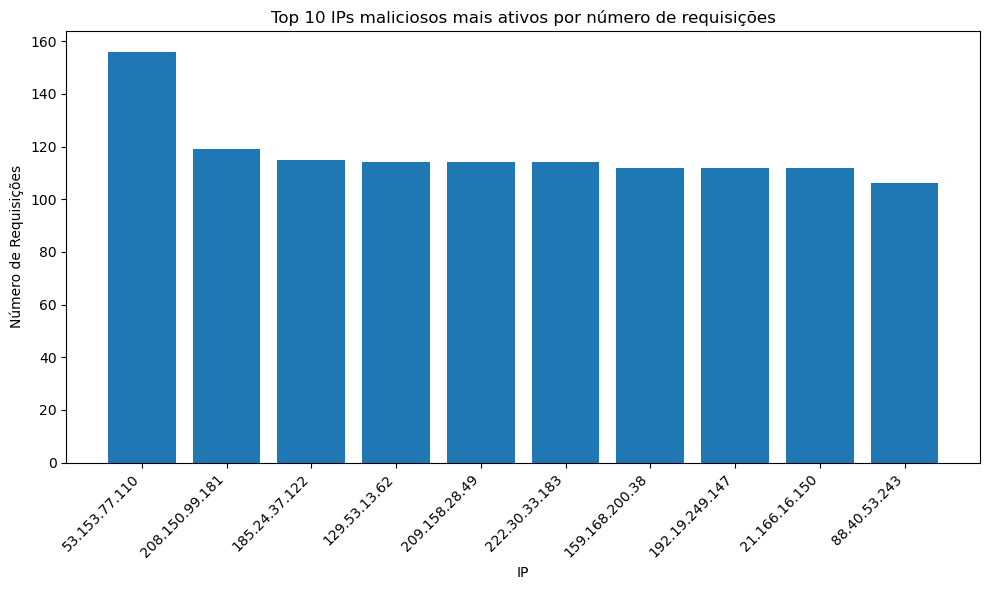

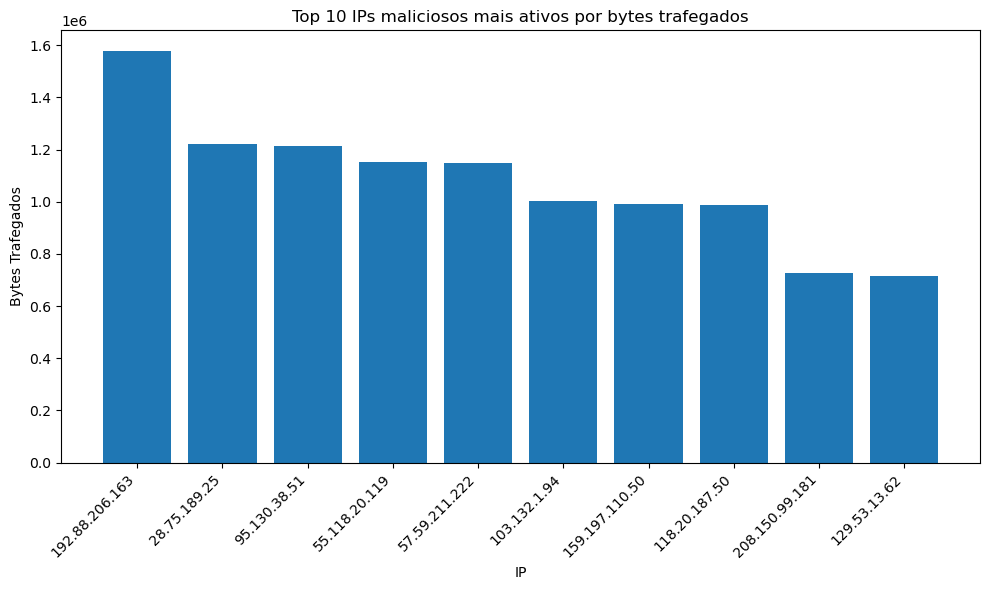

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
file_path = r'data/registros_filtrados.csv'  
data = pd.read_csv(file_path)

# Agrupar por IP e calcular o total de requisições e bytes trafegados
grouped_ips = data.groupby('ClientIP').agg(
    total_requests=('ClientIP', 'count'),
    total_bytes=('ClientRequestBytes', 'sum')
).reset_index()

# Selecionar os 10 IPs mais ativos com base no número de requisições
top_10_ips = grouped_ips.nlargest(10, 'total_requests')

# Gráfico de barras: Top 10 IPs mais ativos por requisições
plt.figure(figsize=(10, 6))
plt.bar(top_10_ips['ClientIP'], top_10_ips['total_requests'])
plt.title('Top 10 IPs maliciosos mais ativos por número de requisições')
plt.xlabel('IP')
plt.ylabel('Número de Requisições')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Selecionar os 10 IPs mais ativos com base nos bytes trafegados
top_10_bytes = grouped_ips.nlargest(10, 'total_bytes')

# Gráfico de barras: Top 10 IPs mais ativos por bytes trafegados
plt.figure(figsize=(10, 6))
plt.bar(top_10_bytes['ClientIP'], top_10_bytes['total_bytes'])
plt.title('Top 10 IPs maliciosos mais ativos por bytes trafegados')
plt.xlabel('IP')
plt.ylabel('Bytes Trafegados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
Recomendação: Bloqueio dos Ips recorrentes.

In [57]:
# Definir os padrões para tentativa de exploração de vulnerabilidades (Injection)
patterns = [
    r"select", r"union", r"drop", r"insert", r"update", r"delete",  # SQL Injection
    r"cmd", r"exec", r"shell", r"system",                          # Command Injection
    r"<script>", r"javascript:", r"onerror=", r"marquee", r"alert", # XSS
    r"'|\"|--|;|%|\|",                                             # Caracteres especiais
]

# Inicializar um DataFrame vazio para armazenar os resultados
suspicious_requests = pd.DataFrame()

# Filtrar as requisições suspeitas para cada padrão separadamente, ignorando '/total/system'
for pattern in patterns:
    filtered_requests = data[
        (data['ClientRequestPath'].str.contains(pattern, na=False, case=False)) & 
        (data['ClientRequestPath'] != '/total/system')  # Excluir '/total/system'
    ]
    suspicious_requests = pd.concat([suspicious_requests, filtered_requests])

# Remover duplicatas (se a mesma requisição corresponder a múltiplos padrões)
suspicious_requests = suspicious_requests.drop_duplicates()

# Adicionar campos adicionais ao relatório
additional_fields = [
    'ClientCountry', 'ClientDeviceType', 'ClientRequestBytes', 
    'ClientRequestHost', 'ClientRequestReferer'
]

# Selecionar os campos relevantes, incluindo os novos
suspicious_requests_report = suspicious_requests[
    ['ClientIP', 'ClientRequestMethod', 'ClientRequestPath', 'ClientRequestURI'] + additional_fields
]

# Exportar o relatório atualizado para um arquivo CSV
suspicious_requests_report.to_csv('todas_tentativas_injection_path_completo.csv', index=False)

# Exibir o relatório no console (primeiras linhas)
#print("Relatório Completo de Tentativas de Injection (Com Campos Adicionais):")
#print(suspicious_requests_report.head())


## 4. Requisições excessivamente grandes
Requisições excessivamente grandes podem indicar possíveis ataques DDoS, abusos de recursos, ou erros de configuração.

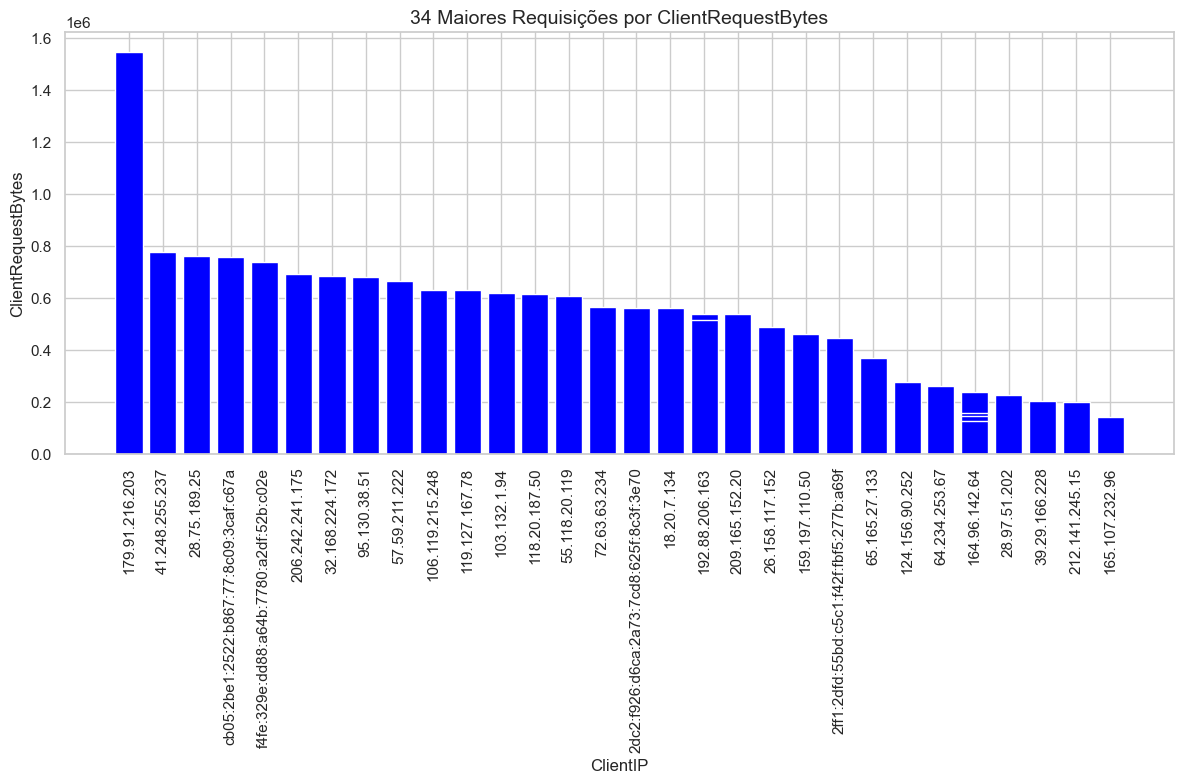

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
file_path = 'Data/dados_totais.csv'  
data = pd.read_csv(file_path)

# Selecionar as 34 maiores requisições com base em ClientRequestBytes
top_34 = data.nlargest(34, 'ClientRequestBytes')

# Criar um gráfico de barras com as 34 maiores requisições
plt.figure(figsize=(12, 8))
plt.bar(top_34['ClientIP'], top_34['ClientRequestBytes'], color='blue')
plt.xlabel('ClientIP', fontsize=12)
plt.ylabel('ClientRequestBytes', fontsize=12)
plt.title('34 Maiores Requisições por ClientRequestBytes', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Recomendação: Verificar se os IPs que realizaram essas requisições são confiáveis, bloquear IPs suspeitos através do WAF ou sistemas de gerenciamento de tráfego, confirmar se há endpoints que permitem transferências muito grandes ou desnecessárias e ajustar a lógica de negócios para limitar os dados retornados

## 5. Conclusão

A análise apresentada foi realizada utilizando Python como linguagem principal, em conjunto com o Jupyter Notebook como ferramenta para processamento e visualização dos dados. Com base nos dados fornecidos, identificou-se que quase 1/3 das requisições analisadas possuem origem maliciosa, destacando a importância de medidas proativas de segurança.

Além disso, há uma parcela significativa de requisições que necessitam de dados complementares para determinação precisa da intenção, indicando a necessidade de monitoramento contínuo e coleta de informações adicionais.

Apesar da gravidade das descobertas, as medidas preventivas para mitigar os riscos são relativamente simples e de fácil implementação, incluindo:

- Validação de entradas para prevenir injeções;
- Configuração de firewalls para bloquear IPs maliciosos;
- Uso de ferramentas como WAFs para proteção em tempo real;
- Monitoramento contínuo para detecção de padrões anômalos;

Essas ações, se implementadas adequadamente, podem reduzir drasticamente a superfície de ataque e proteger a aplicação contra tentativas maliciosas.

---
**Anexos**: Gráficos, tabelas e logs detalhados que suportam as análises apresentadas.